 # <img src="./data/inflation.png" alt="Statistics Icon" width="30"/> **Exploratory Data Analysis (EDA) of Airbnb Listings in New York City: Unraveling Price Determinants** <img src="./data/books.png" alt="Book Icon" width="30"/>

As the demand for Airbnb accommodations continues to surge, *<span style="color:#4285f4">understanding the dynamics that influence pricing</span>* in specific locations becomes imperative for hosts, property managers, and stakeholders alike. In response to this need, the following *<span style="color:#4285f4">Exploratory Data Analysis (EDA)</span>* has been conducted to unravel the intricate patterns within the *<span style="color:#4285f4">Airbnb listings dataset.</span>*

# <img src="./data/target.png" alt="Objective Icon" width="30"/> **Objective**

The primary goal of this analysis is to *<span style="color:#4285f4">discern the factors contributing to higher prices in certain places.</span>* 

By delving into the dataset, the aim is not only to *<span style="color:#4285f4">facilitate strategic decision-making</span>* for hosts and stakeholders but also to deepen the comprehension of the *<span style="color:#4285f4">multifaceted elements that intricately shape the pricing dynamics</span>* of Airbnb listings. 

These insights will serve as a valuable resource for;
- Optimizing pricing strategies, 
- Enhancing the overall guest experience, and 
- Seizing opportunities

within the dynamic landscape of short-term rentals.

# <img src="./data/file.png" alt="Overview Icon" width="30"/> **Dataset Overview**

The dataset encompasses a rich array of features, ranging from property characteristics and host details to guest reviews and geographic coordinates. The extensive nature of this dataset allows for *<span style="color:#4285f4">a comprehensive exploration, shedding light on both numerical and categorical facets influencing pricing dynamics in New York City.</span>*

# <img src="./data/iteration.png" alt="Methodology Icon" width="30"/> **Methodology**

![Methodology](./data/methodology-1.png)


# <img src="./data/question-mark.png" alt="Questionmark Icon" width="30"/> **Decoding Airbnb Prices: Probing Questions for Deeper Insights**

1. **What is the <span style="color:#4285f4">*distribution of Airbnb prices*</span>, and what insights can we gain from it?**

2. **How do *<span style="color:#4285f4">property types</span>* correlate with prices?**

3. **Are *<span style="color:#4285f4">specific neighborhoods</span>* associated with higher or lower prices?**

4. **What *<span style="color:#4285f4">amenities</span>* significantly impact listing prices?**

5. **Do *<span style="color:#4285f4">host-related features</span>* (superhost status, response time) correlate with prices?**

6. **Are *<span style="color:#4285f4">outlier listings</span>* due to unique features or circumstances, and how do they influence prices?**

# <img src="./data/data-cleaning.png" alt="Datacleaning Icon" width="30"/> **Data Loading and Cleaning**

In [1]:
# essential libraries for this EDA
import pandas as pd
import numpy as np
import geopandas
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMap

In [2]:
# read & load the dataset into pandas dataframe
listings = pd.read_csv('./data/airbnb_nyc.csv', delimiter=',')

In [3]:
# clean the rows that ALL columns in a row are NaN
listings.dropna(how="all", inplace=True)

In [4]:
# check the no. of columns & rows
print('Airbnb Dataset Contains, Rows: {:,d} & Columns: {}'.format(listings.shape[0], listings.shape[1]))

Airbnb Dataset Contains, Rows: 30,179 & Columns: 81


In [5]:
# check key details to comprehend the dataset thoroughly and initiate a structured exploration
# with this we can also uncover the lineup of columns in the listing dataset
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   summary                                       28961 non-null  object 
 3   description                                   29575 non-null  object 
 4   experiences_offered                           30179 non-null  object 
 5   neighborhood_overview                         18113 non-null  object 
 6   transit                                       18190 non-null  object 
 7   house_rules                                   16622 non-null  object 
 8   host_id                                       30179 non-null  int64  
 9   host_since                                    30170 non-null 

In [6]:
# check NaN values in each column to guarantee the accuracy and reliability of the data
for column in listings.columns:
    print(column, listings[column].isnull().sum())

id 0
name 13
summary 1218
description 604
experiences_offered 0
neighborhood_overview 12066
transit 11989
house_rules 13557
host_id 0
host_since 9
host_response_time 13097
host_response_rate 13097
host_is_superhost 9
host_listings_count 9
host_identity_verified 9
street 0
neighbourhood 9
latitude 0
longitude 0
property_type 0
room_type 0
accommodates 0
bathrooms 0
bedrooms 0
beds 0
bed_type 0
amenities 0
price 0
guests_included 0
extra_people 0
minimum_nights 0
calendar_updated 0
has_availability 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
number_of_reviews_ltm 0
review_scores_rating 9085
review_scores_accuracy 9111
review_scores_cleanliness 9101
review_scores_checkin 9129
review_scores_communication 9110
review_scores_location 9132
review_scores_value 9130
instant_bookable 0
cancellation_policy 0
calculated_host_listings_count 0
calculated_host_listings_count_entire_homes 0
calculated_host_listings_count_private_rooms 0
calculated_hos

In [7]:
# check which columns have higher NaN values
columns_with_high_nan = [column for column in listings.columns if listings[column].isnull().sum() > 12000]
listings[columns_with_high_nan].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   neighborhood_overview  18113 non-null  object 
 1   house_rules            16622 non-null  object 
 2   host_response_time     17082 non-null  object 
 3   host_response_rate     17082 non-null  float64
dtypes: float64(1), object(3)
memory usage: 943.2+ KB


<div style="background-color: rgba(144, 238, 144, 0.5); color: black; padding: 10px; border-radius: 5px;">
    <img src="./data/research.png" alt="Research Icon" width="25"/> <strong>Noteworthy Data Observation:</strong> 

Exploring columns like <strong><i>"neighborhood_overview", "house_rules", "host_response_time", "host_response_rate"</i></strong> highlights a considerable number of missing values. Depending on how important these columns are, it should be considered to fill in missing data or carefully examine how their absence might affect the analysis.
</div>


In [8]:
# Load in the dataframe of calendar.
calendar = pd.read_csv('./data/calendar.csv', delimiter=',')

In [9]:
# Remove the $ from the price variables.
calendar['price'] = calendar['price'].replace('[$,]', '', regex=True).astype(float)
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[$,]', '', regex=True).astype(float)

In [10]:
# convert 'date' into datetime class
calendar["date"] = pd.to_datetime(calendar["date"], format = "%Y-%m-%d")
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   listing_id      100000 non-null  int64         
 1   date            100000 non-null  datetime64[ns]
 2   available       100000 non-null  object        
 3   price           99995 non-null   float64       
 4   adjusted_price  99995 non-null   float64       
 5   minimum_nights  100000 non-null  float64       
 6   maximum_nights  100000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 5.3+ MB


# <img src="./data/market2.png" alt="House Price Icon" width="30"/> **Price Distribution Analysis**

A detailed analysis of the distribution of Airbnb prices sets the stage, providing a foundational understanding of the pricing landscape.

In [11]:
# mean, median and standard deviation values in pricing in New York
mean_price = round(listings['price'].mean(), 2)
median_price = round(listings['price'].median(), 2)
std_price = round(listings['price'].std(), 2)

print(f"Mean Price: ${mean_price}, Median Price: ${median_price}, Standard Deviation: {std_price}")

Mean Price: $132.95, Median Price: $100.0, Standard Deviation: 93.15


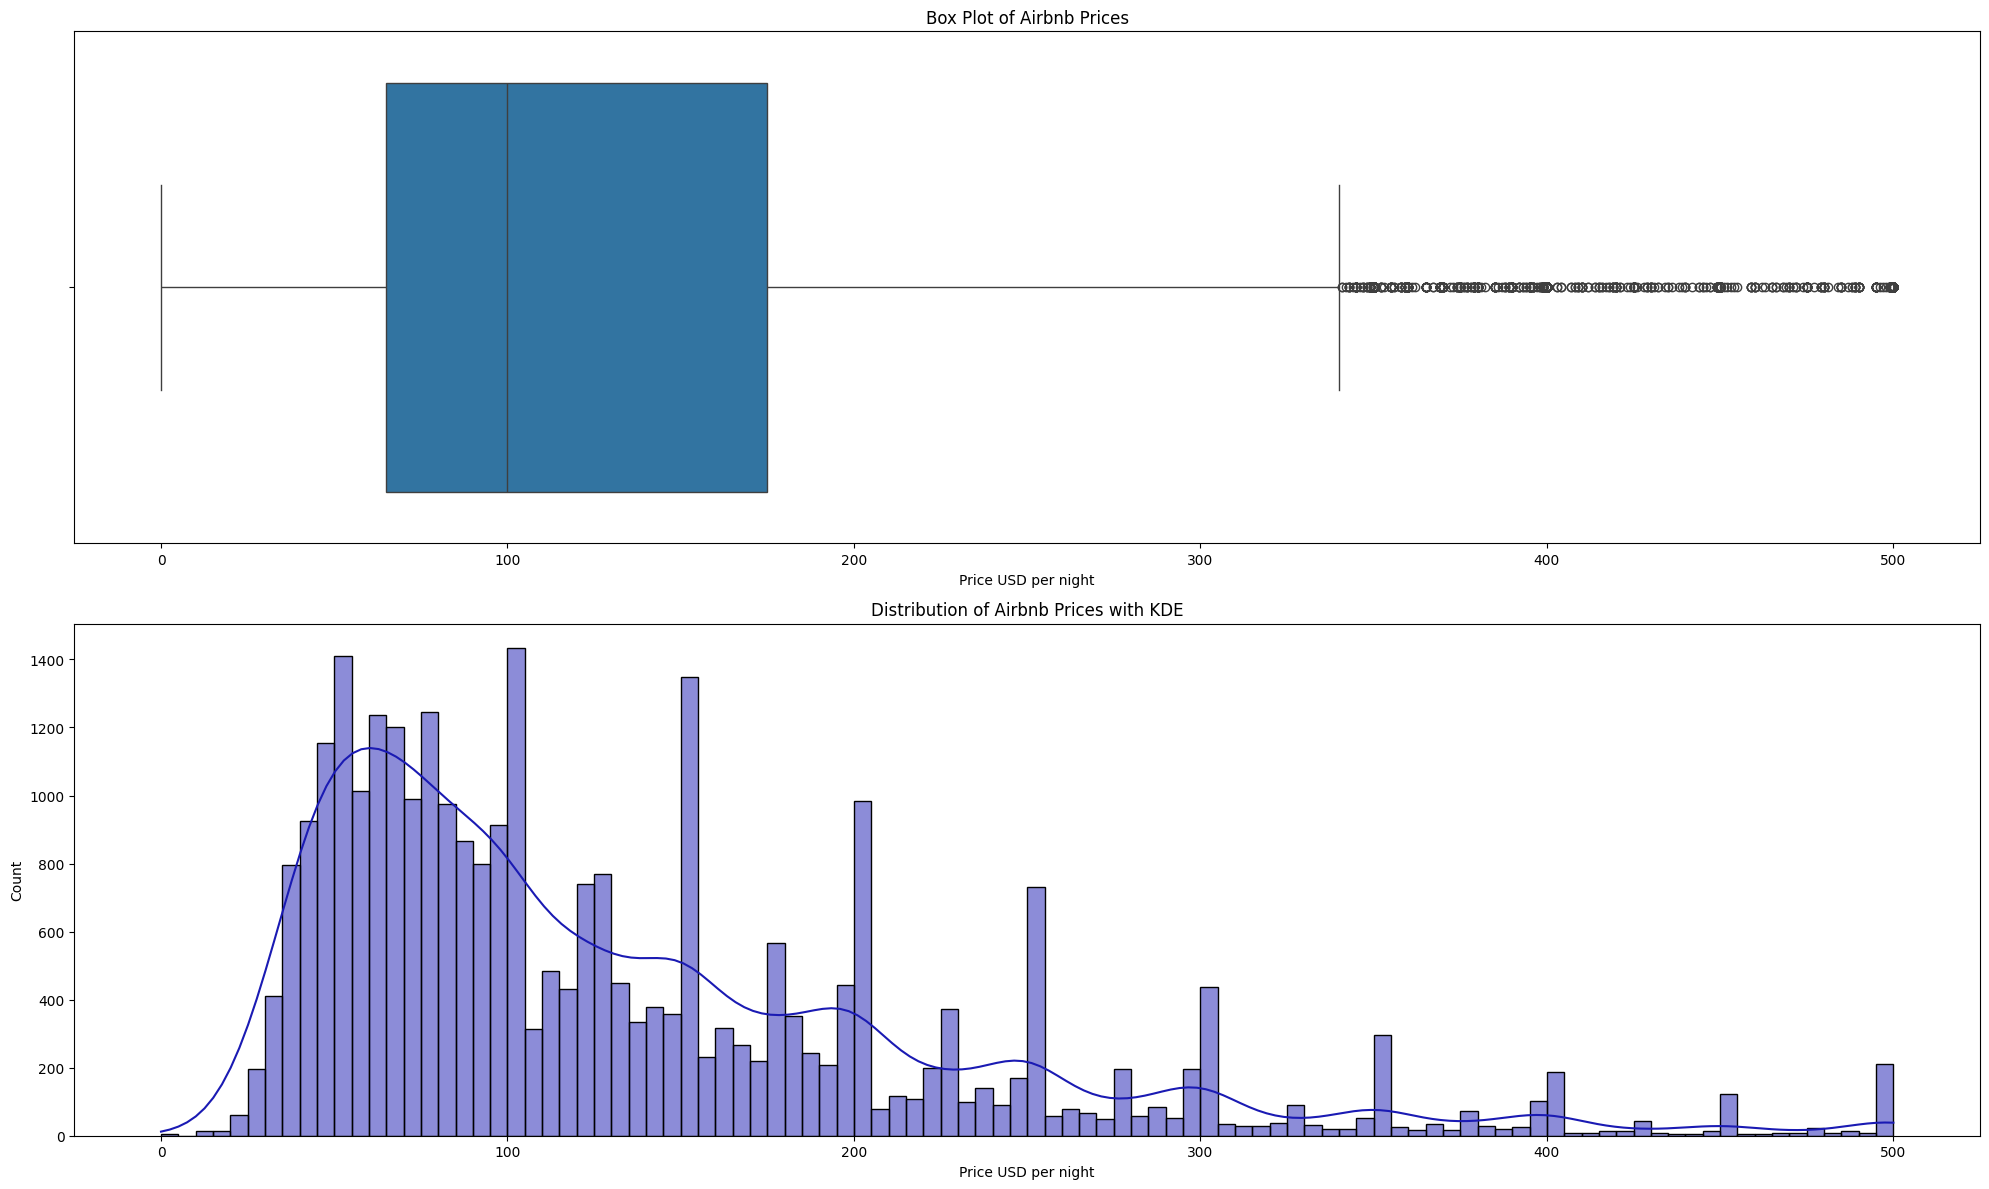

In [12]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))

# Box plot on the first subplot
sns.boxplot(x=listings['price'], ax=ax1)
ax1.set_title('Box Plot of Airbnb Prices')
ax1.set_xlabel('Price USD per night')

# Histplot with KDE on the second subplot
sns.histplot(listings, x="price", binwidth=5, color=(0.1, 0.1, 0.7), ax=ax2, kde=True)
ax2.set_title('Distribution of Airbnb Prices with KDE')
ax2.set_xlabel('Price USD per night')
ax2.set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

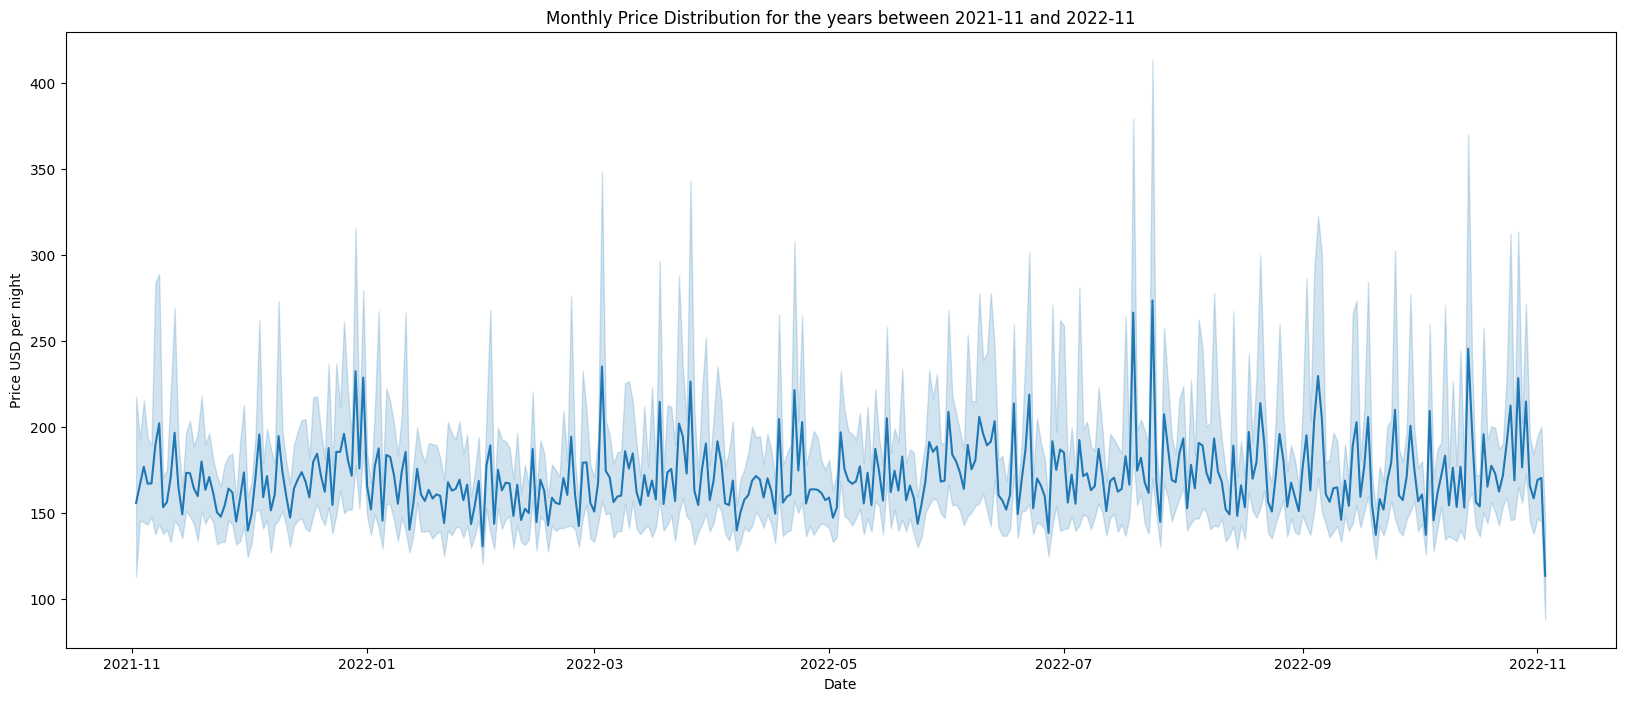

In [13]:
# plot the prices for the months for the years between 2021-11 and 2022-11
plt.figure(figsize=(20, 8))
sns.lineplot(data=calendar, x="date", y="price")
plt.title('Monthly Price Distribution for the years between 2021-11 and 2022-11')
plt.xlabel('Date')
plt.ylabel('Price USD per night')
plt.show()


## <img src="./data/insight.png" alt="Insight Icon" width="30"/> **Insights:**

<div style="background-color: rgba(144, 238, 144, 0.5); color: black; padding: 10px; border-radius: 5px;">

- It is apparent that prices are predominantly concentrated within the range of <strong><i> $30-100</i></strong>. 

- Nevertheless, the presence of certain <strong><i>prominent peaks or outliers</i></strong> deviating from the typical curve suggests anomalies and effects the normality of the price distribution as can be seen that the graph results in <strong><i>asymmetric distributions.</i></strong>

- This deviation could be attributed to house hosts exhibiting more a <strong><i>preference for rounded price values</i></strong>, such as 200, 250, 300, 350, 400, 500, etc.

- The highest price is noted during the month of <strong><i>August,</i></strong> indicative of heightened demand typically associated with the summer season. This phenomenon underscores a correlation between <strong><i>increased demand and higher pricing</i></strong> during this specific period.
</div>

# <img src="./data/correlation.png" alt="Correlation Icon" width="30"/> **Correlation, Relationships and Categorical Variables**

This step delves into understanding the *<span style="color:#4285f4">connections and dependencies</span>* among different features in the dataset. The *<span style="color:#4285f4">correlation between features</span>* aims to quantify relationships, revealing patterns that contribute to the pricing dynamics of Airbnb listings.

## Correlation 1: Long term stay and Short term stay

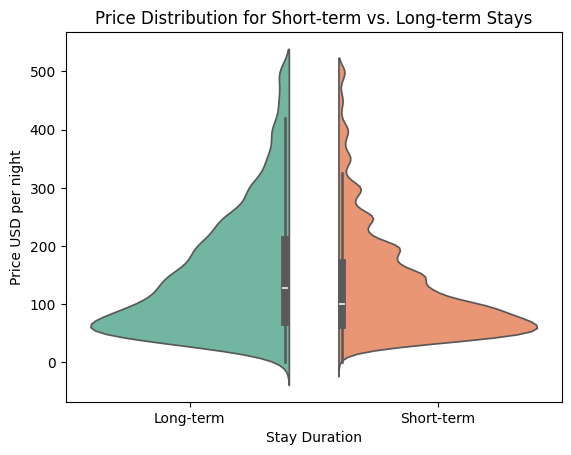

In [14]:
# see how long stay and short stay shapes with price
# Mapping for legend labels
legend_labels = {-1: 'Short-term', 1: 'Long-term'}

# Map the values in the 'long_term_stays' column to the corresponding labels
listings['Stays'] = listings['long_term_stays'].map(legend_labels)

sns.violinplot(x='Stays', y='price', data=listings, hue='Stays', palette='Set2', split=True)
plt.title('Price Distribution for Short-term vs. Long-term Stays')
plt.xlabel('Stay Duration')
plt.ylabel('Price USD per night')
plt.show()

In [15]:
# Calculate the median price for short-term stays
mean_price_short_term_stays = round(listings[listings['long_term_stays'] == -1]['price'].median(), 2)

# Calculate the median price for long-term stays
mean_price_long_term_stays = round(listings[listings['long_term_stays'] == 1]['price'].median(), 2)

print(f"The mean price for short-term stays is: ${mean_price_short_term_stays}")
print(f"The mean price for long-term stays is: ${mean_price_long_term_stays}")

The mean price for short-term stays is: $100.0
The mean price for long-term stays is: $128.0


## <img src="./data/insight.png" alt="Insight Icon" width="30"/> **Insights:**

<div style="background-color: rgba(144, 238, 144, 0.5); color: black; padding: 10px; border-radius: 5px;">

- Both long and short-duration stays predominantly fall within the <strong><i>$30-100 price range.</i></strong>

- However, while the median price for short-term stays is <strong><i>100 USD,</i></strong> long-term stays exhibit a higher median of <strong><i>128 USD</i></strong>, indicating higher costs for longer durations.

- Short-term stays display <strong><i>more fluctuations</i></strong>, particularly in the price range of <strong><i>$150-500</i></strong>. This may be attributed to
 
    - increased competition, 

    - leading to frequent pricing adjustments, and 
    
    - the influence of seasonal variations, events, or holidays affecting pricing dynamics.
</div>

## Correlation 2: Host-related features

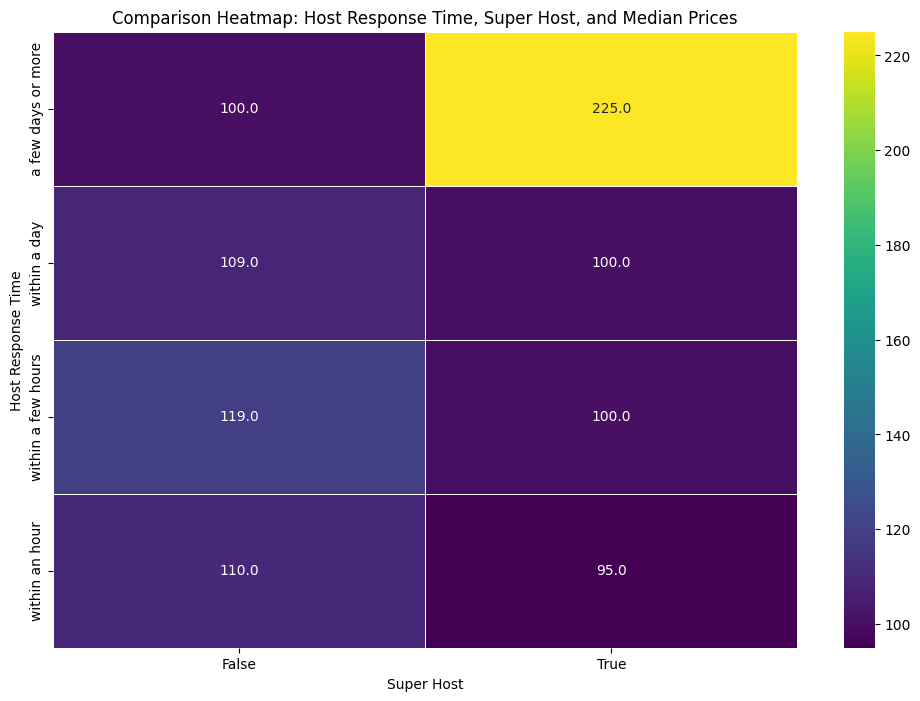

In [16]:
pivot_table_median_host = listings.pivot_table(
    index='host_response_time', 
    columns='host_is_superhost', 
    values='price', 
    aggfunc='median'
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    pivot_table_median_host, 
    cmap='viridis', 
    annot=True, 
    fmt=".1f", 
    linewidths=.5
)

# Update x-axis ticks
heatmap.set_xticklabels(['False', 'True'], rotation=0)

plt.title('Comparison Heatmap: Host Response Time, Super Host, and Median Prices')
plt.xlabel('Super Host')
plt.ylabel('Host Response Time')
plt.show()

## <img src="./data/insight.png" alt="Insight Icon" width="30"/> **Insights:**

<div style="background-color: rgba(144, 238, 144, 0.5); color: black; padding: 10px; border-radius: 5px;">

- The higher median price for superhosts with a response time of a few days or more could be influenced by several factors. Here are some potential reasons:

    - Can be influenced by the <strong><i>increased demand</i></strong> for their listings, resulting in a <strong><i>higher volume of inquiries</i></strong> that could be challenging to address promptly. 

    - Guests may still be <strong><i>willing to pay a premium</i></strong> for the outstanding hospitality and positive experiences associated with superhosts, even if the response time is slightly extended. 
    
    - Additionally, superhosts may <strong><i>strategically set prices</i></strong> based on various factors, including seasonality, local events, and competitor pricing.

   - In addition, as previously indicated, the <strong><i>"host_response_time"</i></strong> column exhibits a significant number of missing values. These omissions have the potential to introduce <strong><i>biases or distort</i></strong> the patterns and relationships that the data is intended to represent. This aspect will be thoroughly examined in the subsequent section to evaluate any potential impact on the data output.
</div>

### Correlation 2.1: Data Imputation for "host_response_time"

In [17]:
# calculate average price for missing rows in host_response_time column
average_price_missing_response_time = round(listings[listings['host_response_time'].isnull()]['price'].mean(), 2)
print(f"The average price for missing rows for host_response_time is: ${average_price_missing_response_time}")

The average price for missing rows for host_response_time is: $123.93


In [18]:
# Set the rounded average price for missing 'host_response_time' rows
# which is close to real $123.93 price
average_price_missing_response_time_rounded = 120

# Find the corresponding 'host_response_time' value for the calculated average price
matching_row = listings[(listings['host_response_time'].notnull()) & 
                        (listings['price'] == average_price_missing_response_time_rounded)]['host_response_time']

# Check if there is a matching row
# mode (most frequently occurring value)
# this assumes that there might be multiple matching rows, 
# and the mode is used to handle multiple potential values.
if not matching_row.empty:
    corresponding_response_time = matching_row.mode().iloc[0]

    # Fill missing 'host_response_time' values with the corresponding value
    listings.loc[listings['host_response_time'].isnull(), 'host_response_time'] = corresponding_response_time
else:
    print("No matching row found for the calculated average price.")

In [19]:
# Check for missing values in 'host_response_time'
missing_values = listings['host_response_time'].isnull().any()
print(f"Are there missing values in 'host_response_time'? {missing_values}")

Are there missing values in 'host_response_time'? False


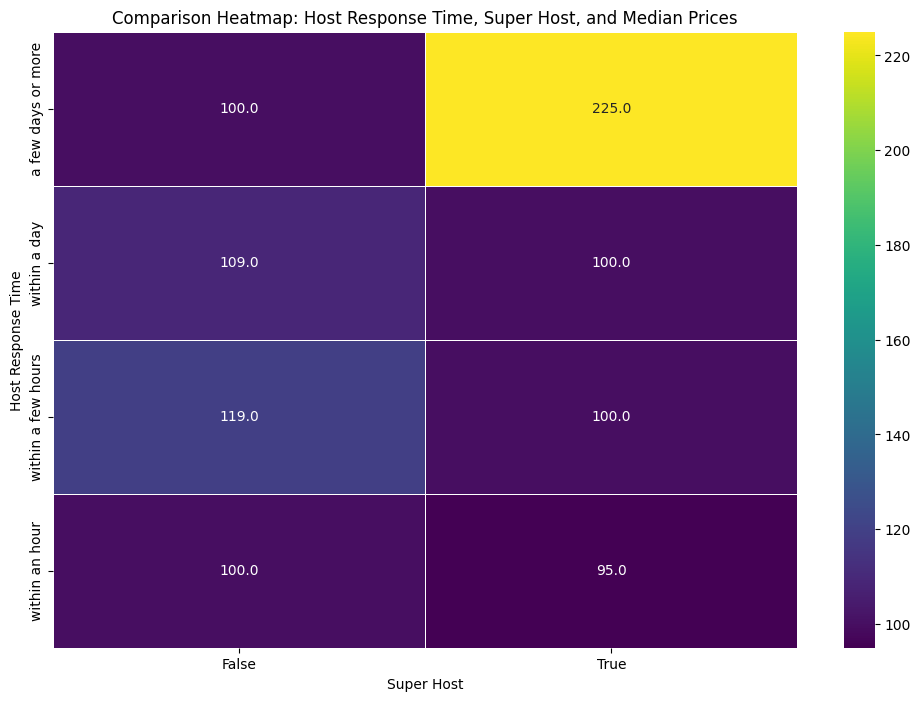

In [20]:
pivot_table_median_host = listings.pivot_table(
    index='host_response_time', 
    columns='host_is_superhost', 
    values='price', 
    aggfunc='median'
)

# Plotting the heatmap with the correct variable
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    pivot_table_median_host, 
    cmap='viridis', 
    annot=True, 
    fmt=".1f", 
    linewidths=.5
)

# Update x-axis ticks
heatmap.set_xticklabels(['False', 'True'], rotation=0)

plt.title('Comparison Heatmap: Host Response Time, Super Host, and Median Prices')
plt.xlabel('Super Host')
plt.ylabel('Host Response Time')
plt.show()

## <img src="./data/insight.png" alt="Insight Icon" width="30"/> **Insights:**

<div style="background-color: rgba(144, 238, 144, 0.5); color: black; padding: 10px; border-radius: 5px;">

- During the imputation process for missing values in the host_response_time column, an <strong><i>assumption was employed.</i></strong> This entailed identifying a row with a price value equal to the calculated average price of the missing rows and assigning the corresponding host_response_time value from that identified row to the missing rows.

- After <strong><i>imputing missing values in the 'host_response_time'</i></strong> column, a thorough analysis revealed that the imputation did not significantly alter the observed patterns and relationships in the dataset. The integrity of the original data was well-preserved, affirming the reliability of subsequent analyses.
</div>

## Correlation 3: Bedrooms and Categorical Variable - Property Types

In [21]:
# let's count the values in each bedrooms
listings.value_counts("bedrooms")

bedrooms
1     24254
2      4321
3      1241
4       279
5        62
6        14
7         4
8         3
11        1
Name: count, dtype: int64

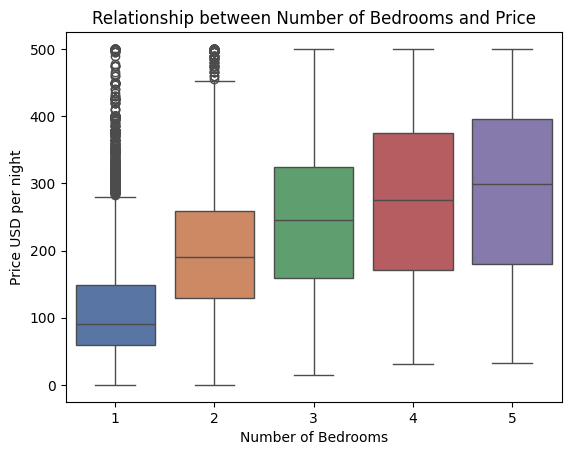

In [22]:
# let's filter the bedroom's between 1 and 5 
# as the number of data entries after 5 bedrooms is not enough to draw a conclusion
sns.boxplot(
    data=listings[listings["bedrooms"] <= 5], 
    x="bedrooms", 
    y="price", 
    hue="bedrooms", 
    palette='deep', 
    legend=False
)

plt.title('Relationship between Number of Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price USD per night')
plt.show()

In [23]:
# let's count the values in each property_type
property_type_counts = listings['property_type'].value_counts()
property_type_counts

property_type
Apartment                 24538
House                      2125
Condominium                 982
Townhouse                   772
Loft                        740
Serviced apartment          290
Hotel                       192
Guest suite                 137
Boutique hotel              104
Other                        65
Bed and breakfast            63
Hostel                       43
Resort                       25
Guesthouse                   24
Bungalow                     19
Aparthotel                   11
Villa                         9
Tiny house                    7
Cabin                         4
Earth house                   4
Casa particular (Cuba)        3
Tent                          3
Boat                          3
Cottage                       3
Farm stay                     2
Yurt                          2
Cave                          2
Houseboat                     2
Dome house                    1
Castle                        1
Camper/RV                 

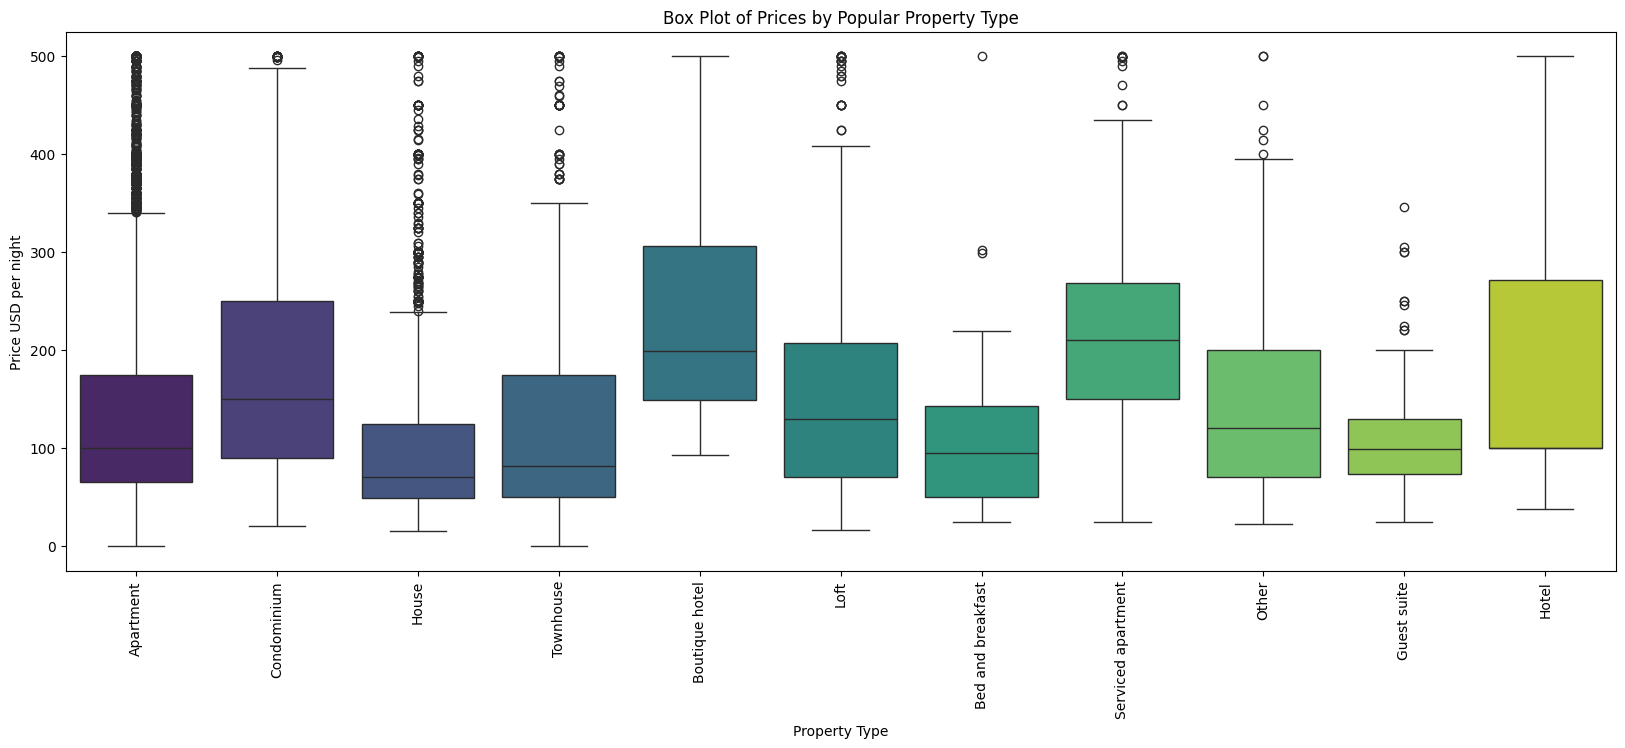

In [24]:
# let's filter the property_types until bed and breakfast
# as the number of data entries after bed and breakfast is not enough to draw a conclusion
# .index attribute is used to retrieve the index labels
popular_property_types = property_type_counts[property_type_counts >= 63].index
filtered_listings = listings[listings['property_type'].isin(popular_property_types)]

plt.figure(figsize=(20, 7))
sns.boxplot(
    data=filtered_listings, 
    x='property_type', 
    y='price', 
    palette='viridis', 
    hue='property_type', 
    legend=False
)

plt.xlabel('Property Type')
plt.ylabel('Price USD per night')
plt.title('Box Plot of Prices by Popular Property Type')
plt.xticks(rotation=90)
plt.show()

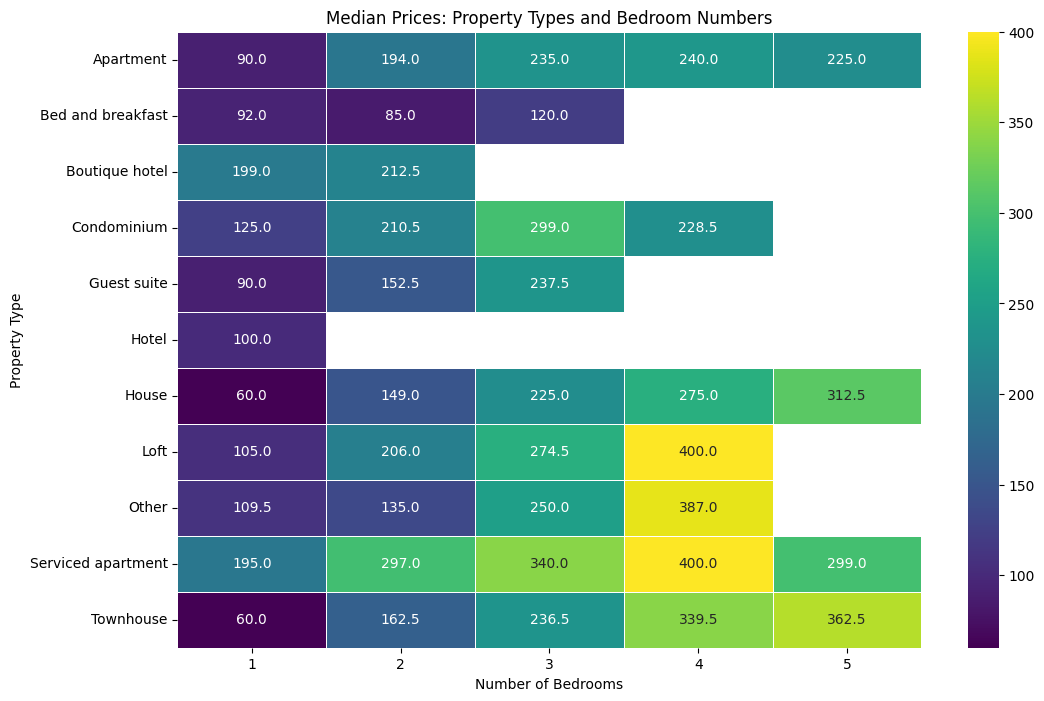

In [25]:
# Create a pivot table with median prices for each property type and bedroom number
mixed_filtered_listings = filtered_listings[(filtered_listings["bedrooms"] <= 5)]
pivot_table_median = mixed_filtered_listings.pivot_table(
    index='property_type', 
    columns='bedrooms', 
    values='price', 
    aggfunc='median'
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table_median, 
    cmap='viridis', 
    annot=True, 
    fmt=".1f", 
    linewidths=.5
)

plt.title('Median Prices: Property Types and Bedroom Numbers')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Property Type')
plt.show()

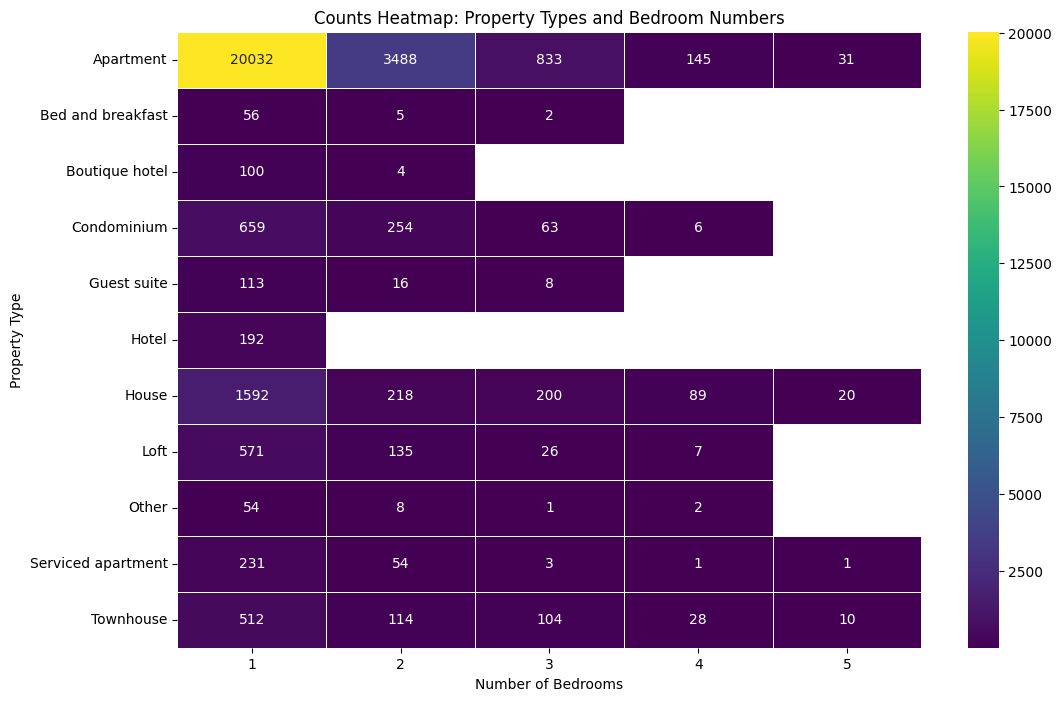

In [26]:
# Create a pivot table with counts for each property type and bedroom number
pivot_table_counts = mixed_filtered_listings.pivot_table(
    index='property_type', 
    columns='bedrooms', 
    values='id', 
    aggfunc='count'
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_counts, 
            cmap='viridis', 
            annot=True, 
            fmt=".0f", 
            linewidths=.5
)

plt.title('Counts Heatmap: Property Types and Bedroom Numbers')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Property Type')
plt.show()


In [27]:
property_types = ['Boutique hotel', 'Serviced apartment', 'House', 'Townhouse']

grouped_median_prices = listings.loc[(listings['property_type'].isin(property_types)) & \
                                     (listings['bedrooms'] <= 5)].groupby('property_type')['price'].median()

for property_type, median_price in grouped_median_prices.items():
    print(f"The median price for {property_type} in the 'property_type' \
column with bedrooms less than or equal to 5 is: ${median_price}")


The median price for Boutique hotel in the 'property_type' column with bedrooms less than or equal to 5 is: $199.0
The median price for House in the 'property_type' column with bedrooms less than or equal to 5 is: $70.0
The median price for Serviced apartment in the 'property_type' column with bedrooms less than or equal to 5 is: $210.0
The median price for Townhouse in the 'property_type' column with bedrooms less than or equal to 5 is: $80.5


## <img src="./data/insight.png" alt="Insight Icon" width="30"/> **Insights:**

<div style="background-color: rgba(144, 238, 144, 0.5); color: black; padding: 10px; border-radius: 5px;">

- <strong><i>A positive correlation</i></strong> is observed between the number of bedrooms and the corresponding prices, indicating that as the number of bedrooms increases, the prices also tend to increase.

- Notably, property types such as <strong><i>boutique hotels and serviced apartments</i></strong> exhibit higher median prices for bedroom numbers less and equal to 5, standing at <strong><i>$199 and 210</i></strong>, respectively.

- Lower prices are evident for property types such as <strong><i>houses and townhouse</i></strong>, with the median price for bedroom numbers less and equal to 5 being <strong><i>$70 and 80.5</i></strong>, respectively.

- It's worth mentioning that there are a <strong><i>greater number of entries for property types with 1 and 2 number of bedrooms</i></strong>, which may be attributed to the <strong><i>presence of outliers</i></strong> in these categories.

</div>

# <img src="./data/geospatial-technology.png" alt="Geospatial Icon" width="30"/> **Geospatial Exploration and Review Scores**

Conducting a geospatial analysis utilizing latitude and longitude coordinates will elucidate insights into the impact of location and property characteristics on pricing dynamics.

## Expolaration 1: Geospatial Price Distribution of Airbnb in New York City

In [28]:
# for dropping all NaN values
price_m = listings[['latitude','longitude','price']].dropna()

In [29]:
# create a folium OpenStreetMap
folium_hmap = folium.Map(
    location=[price_m['latitude'].median(), price_m['longitude'].median()], 
    tiles='OpenStreetMap', 
    zoom_start = 11
)

folium_hmap.add_child(
    HeatMap(
        price_m[['latitude','longitude','price']],
        min_opacity=0.2,
        radius = 10,
        blur = 9
    )
)

# add markers to most famous places to see the corralation with high prices
markers = [
    folium.Marker(location=[40.689249400000016, -74.0445004], popup="Statue of Liberty"),
    folium.Marker(location=[40.748383575496895, -73.98566440361527], popup="Empire State Building"),
    folium.Marker(location=[40.782522176135764, -73.96557267477814], popup="Central Park"),
    folium.Marker(location=[40.75795841775372, -73.985574790120844], popup="Times Square"),
    folium.Marker(location=[40.7055333883852, -73.95008798218782], popup="Broadway Metro Station"),
    folium.Marker(location=[40.70601167190474, -74.00881487478213], popup="Wall Street")
]

[marker.add_to(folium_hmap) for marker in markers]

folium_hmap

## <img src="./data/insight.png" alt="Insight Icon" width="30"/> **Insights:**

<div style="background-color: rgba(144, 238, 144, 0.5); color: black; padding: 10px; border-radius: 5px;">
The spatial representation illustrates that the areas with the <strong><i>highest rental costs</i></strong> in Airbnb listings are primarily concentrated around <strong><i>Wall Street</i></strong>. Additionally, noteworthy locations with <strong><i>elevated prices</i></strong> include those proximate to <strong><i>Times Square</i></strong> and the <strong><i>Empire State Building</i></strong>.
</div>

## Expolaration 2: Review Score Rating and Number of Reviews of Airbnb in New York City

In [30]:
# drop all NaN
heat_data = listings[['latitude', 'longitude', 'review_scores_rating']].dropna()

In [31]:
# calculate one of the min value for review_scores_rating
min_value = heat_data.loc[heat_data['review_scores_rating'].idxmin()]
min_value

latitude                40.71930
longitude              -73.98986
review_scores_rating    20.00000
Name: 1056, dtype: float64

In [32]:
# calculate one of the max value for review_scores_rating
max_value = heat_data.loc[heat_data['review_scores_rating'].idxmax()]
max_value

latitude                 40.67343
longitude               -73.98338
review_scores_rating    100.00000
Name: 11, dtype: float64

In [33]:
# Define the color scale
gradient = {0.2: 'green', 0.5: 'blue', 1.0: 'red'}

# Set the minimum opacity to start from 20
min_opacity = 0.2

# Set the maximum value to 100
max_val = 100

# Normalize the values between 0 and 1
heat_data['normalized_rating'] = (heat_data['review_scores_rating'] - 20) / (max_val - 20)

# Create a Folium map
folium_hmap_2 = folium.Map(
    location=[heat_data['latitude'].mean(), heat_data['longitude'].mean()], 
    zoom_start=11
)

# Create HeatMap layer with customized color scale
folium_hmap_2.add_child(
    HeatMap(
    data=heat_data[['latitude', 'longitude', 'normalized_rating']], 
    radius=8, 
    blur=6, 
    max_zoom=13, 
    gradient=gradient, 
    min_opacity=min_opacity).add_to(folium_hmap_2)
)

# this part is just to play around to see where are the one of the max value located and min value located
folium.Marker(
    location=[min_value['latitude'], min_value['longitude']], 
    popup=f"Min Rating: {min_value['review_scores_rating']}").add_to(folium_hmap_2)

folium.Marker(
    location=[max_value['latitude'], max_value['longitude']], 
    popup=f"Max Rating: {max_value['review_scores_rating']}").add_to(folium_hmap_2)

# Display the map
folium_hmap_2

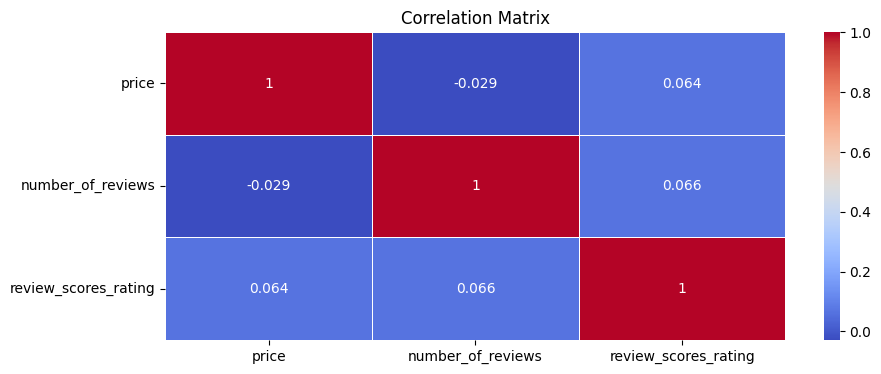

In [34]:
# correlation heatmap for number_of_reviews and review_scores_rating
plt.figure(figsize=(10, 4))
correlation_matrix = listings[['price', 'number_of_reviews', 'review_scores_rating']].corr()
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

## <img src="./data/insight.png" alt="Insight Icon" width="30"/> **Insights:**

<div style="background-color: rgba(144, 238, 144, 0.5); color: black; padding: 10px; border-radius: 5px;">

1. <strong>Number of Reviews:</strong>

    - <strong><i>Correlation with Price:</i></strong> Negative

    - <strong><i>Observation:</i></strong> As the number of reviews increases, there is a tendency for prices to decrease. This unexpected correlation warrants further investigation.

2. <strong>Review Scores Rating:</strong>

    - <strong><i>Correlation with Price:</i></strong> Positive

    - <strong><i>Observation:</i></strong> Higher review scores align with higher prices, consistent with expectations that well-reviewed properties command premium rates.

3. <strong>Surprising Correlations:</strong>

    - The negative correlation between the number of reviews and price presents an <strong><i>intriguing phenomenon.</i></strong>

4. <strong>Hypotheses for Surprising Correlations:</strong>

    - One plausible explanation is that properties accumulating a high number of reviews <strong><i>may attract budget-conscious travelers</i></strong>, leading to a preference for more affordable accommodations and subsequently lower average prices.

    - Another factor to consider is the potential for properties to amass a notable quantity of <strong><i>unfavorable reviews</i></strong>, leading to an inflated review count and exerting downward pressure on prices.
</div>

# <img src="./data/amenities.png" alt="Amenities Icon" width="30"/> **Amenities**

Examining the prevalence of various amenities and their correlation with property prices is a crucial aspect of our analysis. By understanding the preferences of potential guests, property owners can tailor their offerings to meet the expectations of a discerning clientele, ultimately enhancing the overall guest experience and potentially attracting a higher-paying customer base.

In [ ]:
listings['amenities']

In [36]:
# 'price_threshold' is the threshold for higher prices
price_threshold = 200

# Filter higher-priced listings
higher_priced_listings = listings[listings['price'] > price_threshold]

# Create an empty list to store individual amenities
higher_price_amenities_list = []

# Concatenate amenities strings from each row of higher-priced listings
# extend() is used for a flat list, essential for accurate counting of individual amenities, 
# while append() would create nested lists.
for amenities_str in higher_priced_listings['amenities']:
    higher_price_amenities_list.extend(amenities_str.replace('"', '').split(','))

# Create a DataFrame to count the occurrences of each amenity
amenities_counts = pd.Series(higher_price_amenities_list).value_counts()

# Display the most common top 10 amenities in higher-priced listings
top_amenities = amenities_counts.head(10)
print("Top Amenities in Higher-Priced Listings:")
print(top_amenities)

Top Amenities in Higher-Priced Listings:
Heating                     4875
Kitchen                     4815
Air conditioning            4781
Essentials                  4651
Wifi                        4570
Smoke detector              4570
{TV                         4423
Hangers                     3876
Hair dryer                  3813
Carbon monoxide detector    3806
Name: count, dtype: int64


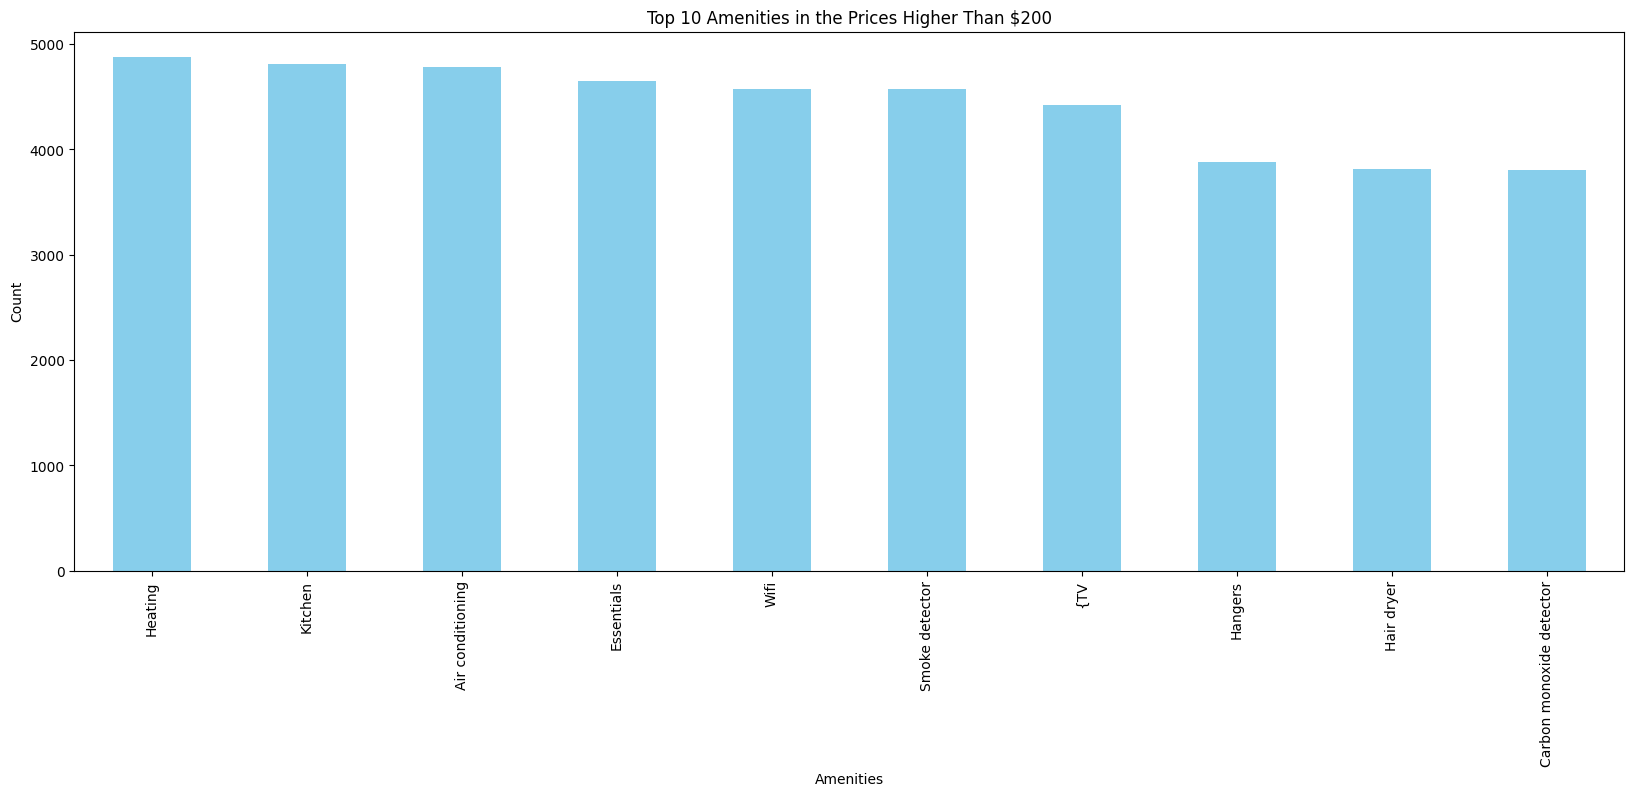

In [37]:
# plot the top 10 amenities for prices > $200
top_amenities.plot(
    kind='bar', 
    figsize=(20, 7), 
    color='skyblue'
)

plt.title('Top 10 Amenities in the Prices Higher Than $200')
plt.xlabel('Amenities')
plt.ylabel('Count')
plt.show()


## <img src="./data/insight.png" alt="Insight Icon" width="30"/> **Insights:**

<div style="background-color: rgba(144, 238, 144, 0.5); color: black; padding: 10px; border-radius: 5px;">

Property owners can utilize these findings to <strong><i>customize their offerings</i></strong>, aligning them more closely with the preferences of a discerning customers.

- Higher-priced listings tend to <strong><i>prioritize guest comfort and safety</i></strong>, as indicated by the prevalence of amenities such as <strong><i>heating, kitchen facilities, and air conditioning.</i></strong>

- Essential items, including <strong><i>Wifi for connectivity,</i></strong> are commonly provided, emphasizing a commitment to meeting guest needs. 

- Safety features like <strong><i>smoke detectors and carbon monoxide detectors</i></strong> are standard, reflecting a focus on <strong><i>guest well-being.</i></strong> 

- Additionally, entertainment options like <strong><i>TV</i></strong> and thoughtful touches like <strong><i>hangers and hair dryers</i></strong> contribute to an overall enhanced guest experience. 
</div>

# <img src="./data/conclusion.png" alt="Conclusion Icon" width="30"/> **Expected Outcomes and Recommendations**

### **Handling Missing Values:**

- Key columns, including **_<span style="color:#66CCCC">"neighborhood_overview," "house_rules," "host_response_time," and "host_response_rate"_</span>**, show considerable missing values.

- **_Recommendation:_** Carefully consider the importance of these features and strategize to fill missing data for enhanced listing completeness.

### **Pricing Strategy:**

- Prices predominantly concentrate within the range of **_<span style="color:#6699CC">$30-100.</span>_**

- Presence of outliers suggests anomalies and asymmetric distributions.

- **_Recommendation:_** Evaluate the influence of rounded price values and align pricing strategies accordingly.

### **Seasonal Pricing:**

- **_<span style="color:#66CC66">August sees the highest prices,</span>_** correlating with increased demand in the summer season.

- **_Recommendation:_** Adjust pricing strategies during peak seasons for revenue maximization.

### **Short-Term vs. Long-Term Stays:**

- Median price for short-term stays: **_<span style="color:#FF9966">$100.</span>_**

- Median price for long-term stays: **_<span style="color:#FF9966">$128,</span>_** indicating higher costs for longer durations.

- **_Recommendation:_** Align pricing strategies for extended stays with market expectations.

### **Superhosts Analysis:**

- **_<span style="color:#CC99CC">Higher median price for superhosts with longer response times.</span>_**

- **_Potential Reasons:_** Increased demand, willingness to pay a premium, and strategic pricing.

- **_Recommendation:_** Balance response time with premium hospitality.

### **Imputing Missing Values:**

- Imputing missing values in **_<span style="color:#CC9966">"host_response_time" did not significantly alter observed patterns.</span>_**

- **_Result:_** Integrity of the original data is well-preserved.

- **_Recommendation:_** Proceed with confidence in data reliability.

### **Correlation Analysis:**

- **_<span style="color:green">Positive correlation</span>_** between the number of bedrooms and prices.

- **_Recommendation:_** Assess impact on pricing strategies with adjustments in bedroom numbers.

### **Property Type Analysis:**

- **_<span style="color:#66CC99">Boutique hotels and serviced apartments</span>_** lead with median prices of **_<span style="color:#6699CC">199 USD and 210 USD</span>_** for 5 or fewer bedrooms.

- **_<span style="color:#FF9966">Houses and townhouses</span>_** are more affordable, averaging **_<span style="color:#FF9966">70 USD and 80.5 USD</span>_** for the same bedroom range.

- **_Recommendation:_**  Customize marketing and pricing for upscale options like boutique hotels, serviced apartments. A closer examination of entries with **_<span style="font-weight:bold; color:#7D9EC0">1 and 2 bedrooms</span>_** is advised to leverage potential outliers.

### **Spatial Analysis:**

- Areas with the highest rental costs are concentrated around **_<span style="color:#9966CC">Wall Street, Times Square, and the Empire State Building.</span>_**

- **_Recommendation:_** Implement location-specific strategies in high-value areas.

### **Reviews and Pricing:**

- **_<span style="color:#CC6666">Negative correlation</span>_** between the number of reviews and prices.

- **_Potential Explanation:_** Properties with more reviews may attract budget-conscious travelers, or might receive a lot of negative reviews.

- **_Recommendation:_** Adjust pricing strategies based on review dynamics and look in deep the context of reviews.

### **Amenities and Guest Experience:**

- **_<span style="color:#66CC99">Key Amenities:</span>_** Heating, kitchen facilities, air conditioning, and essential items like Wifi.

- **_Recommendation:_** Prioritize guest comfort and safety for an enhanced guest experience.

### **References**

"New York", Inside Airbnb, http://insideairbnb.com/get-the-data.html
